<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #8: Agrupación de textos
`Fecha de entrega: Abril 29, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [219]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot


from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
stopwords_sp = stopwords.words('spanish')

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import plot_confusion_matrix


In [220]:
# Cargar datos
path = "C:/Users/paula/OneDrive/Escritorio/KONRAD_LORENZ/SEMESTRE_II/NLP/reviews_vidjew_es.csv"
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


###  `[10 pts]` Punto 1: Hacer pre-procesamiento del texto

In [221]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d]+", " ", texto)
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect.fit_transform(data.review_body.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns = tfidf_vect.get_feature_names())

###  `[10 pts]` Punto 2: Método del codo para determinar $K$

In [222]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [223]:
ks = []
k_inertias = []

for k in range(1,19):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    k_inertia = kmeans.inertia_
    ks.append(k)
    k_inertias.append(k_inertia)

C:\Users\paula\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



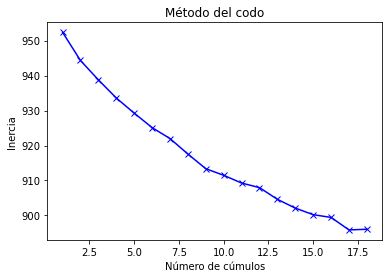

In [224]:
# list(zip(ks,k_inertias))

plt.xlabel("Número de cúmulos")
plt.ylabel("Inercia")
plt.plot(ks, k_inertias, 'bx-')
plt.title("Método del codo");


###  `[10 pts]` Punto 3: Entrenar modelo con el $K$ escogido

In [225]:
k = 9
model = KMeans(n_clusters=k)
model.fit(tfidf_matrix)

KMeans(n_clusters=9)

In [226]:
data['cluster'] = model.labels_
data

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,cluster
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry,2
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games,8
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games,1
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games,5
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games,0
...,...,...,...,...,...,...,...,...,...
995,es_0427672,product_es_0899883,reviewer_es_0474735,2,En la foto parece que la cadena sea más gruesa...,Cadena muy fina,es,jewelry,7
996,es_0059540,product_es_0702564,reviewer_es_0754753,3,"Bien por su precio, la cadena demasiado fina.",E,es,jewelry,5
997,es_0303349,product_es_0678671,reviewer_es_0172313,5,Muy bien!! Ahora tengo organizados los pendien...,Bonito,es,jewelry,4
998,es_0659961,product_es_0294943,reviewer_es_0554554,4,"Las tapas para los joystics no están nada mal,...",No está mal pero sólo he probado las fundas.,es,video_games,8


###  `[15 pts]` Punto 4: Interpretación de los clusters

In [210]:
nbrs = NearestNeighbors(n_neighbors=3, metric='euclidean').fit(tfidf_matrix.values)

clust_cnt = data['cluster'].value_counts()
clust_cnt_pct = data['cluster'].value_counts(normalize=True)

centroides = model.cluster_centers_

terms = tfidf_vect.get_feature_names()
order_centroids = centroids.argsort()[:, ::-1]

for i in range(k):
    print(f"Cluster # {i}")
    print(f"Tiene {clust_cnt[i]} registros ({clust_cnt_pct[i]:.2%} de los datos)")
    print()
    
    print("TÉRMINOS MÁS REPRESENTATIVOS")
    for ind in order_centroids[i][:20]:
        print(terms[ind], end=" ")
    print()
    print()
    
    print(f"DOCUMENTOS MÁS REPRESENTATIVOS")
    for vecino in data.iloc[nbrs.kneighbors([centroides[i]])[1][0]].review_body.values:
        print(f" *** {vecino}")
        print()
        
    print()
    print("********************************************")
    print()


Cluster # 0
Tiene 160 registros (16.00% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
calidad buena precio muy no es el la se de mala por que en pero más tiene puede una un 

DOCUMENTOS MÁS REPRESENTATIVOS
 *** No me ha gustado el juego.

 *** No ha llegado el collar . Las demás cosas que he comprado en Amazon han llegado, pero este producto no me ha llegado.

 *** El producto ha llegado antes de lo previsto, me ha gustado su calidad es más pequeño de lo esperado pero me gusta. Vale la pena.


********************************************

Cluster # 1
Tiene 52 registros (5.20% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
me no un pero para el mucho que es una han lo bien gusta por de muy todo tiene llega 

DOCUMENTOS MÁS REPRESENTATIVOS
 *** Perfecto y en tiempo

 *** Todo en perfecto estado

 *** Llegó a tiempo y en perfecto estado


********************************************

Cluster # 2
Tiene 115 registros (11.50% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
muy la es bonito bien pero 

###  `[BONUS: 3 pts]` Visualización usando PCA

In [211]:
df_centroids = pd.DataFrame(centroids)
df_centroids['cluster'] = clusters.values()
df_centroids

,0,1,2,3,4,5,6,7,8,9,...,3820,3821,3822,3823,3824,3825,3826,3827,3828,cluster
0,-2.168404e-19,0.000000e+00,-5.421011e-20,-2.710505e-20,1.084202e-19,0.000000e+00,1.084202e-19,2.710505e-20,-1.084202e-19,1.084202e-19,...,-2.168404e-19,-2.710505e-20,2.710505e-20,0.000000e+00,-5.421011e-20,0.000000e+00,5.421011e-20,4.336809e-19,4.336809e-19,0
1,-2.168404e-19,4.336809e-19,-5.421011e-20,-5.421011e-20,1.084202e-19,-1.084202e-19,5.449238e-03,2.710505e-20,-1.084202e-19,2.168404e-19,...,-2.168404e-19,-5.421011e-20,2.710505e-20,5.421011e-20,-1.626303e-19,2.168404e-19,1.084202e-19,6.433662e-03,2.168404e-19,1
2,2.168404e-19,7.042281e-03,5.421011e-20,-1.084202e-19,1.084202e-19,1.084202e-19,-2.168404e-19,0.000000e+00,1.626303e-19,3.252607e-19,...,0.000000e+00,-1.084202e-19,5.421011e-20,1.626303e-19,-1.626303e-19,4.336809e-19,1.084202e-19,1.301043e-18,4.886373e-03,2
3,-1.084202e-19,-2.168404e-19,0.000000e+00,0.000000e+00,1.084202e-19,0.000000e+00,2.168404e-19,0.000000e+00,-5.421011e-20,0.000000e+00,...,-1.084202e-19,0.000000e+00,2.710505e-20,-5.421011e-20,1.084202e-19,-1.084202e-19,5.421011e-20,4.336809e-19,2.168404e-19,3
4,1.800937e-03,1.614411e-03,2.710505e-19,5.497840e-04,9.655262e-04,7.796754e-04,-6.505213e-19,-1.084202e-19,1.084202e-19,1.090656e-03,...,6.505213e-19,5.497840e-04,6.403129e-04,2.168404e-19,-2.168404e-19,2.784819e-03,1.178656e-03,4.629529e-03,1.573777e-03,4
5,-3.252607e-19,-4.336809e-19,-5.421011e-20,-1.355253e-20,5.421011e-20,4.582949e-03,0.000000e+00,2.710505e-20,-1.084202e-19,-1.084202e-19,...,-1.084202e-19,-1.355253e-20,0.000000e+00,-1.084202e-19,5.421011e-20,-2.168404e-19,5.421011e-20,4.336809e-19,2.168404e-19,5
6,3.139725e-03,8.673617e-19,1.084202e-19,-1.084202e-19,1.626303e-19,2.070805e-03,-3.252607e-19,9.245530e-04,2.168404e-19,2.038407e-03,...,0.000000e+00,-1.084202e-19,5.421011e-20,2.168404e-19,-1.626303e-19,9.588105e-04,1.084202e-19,1.301043e-18,1.916886e-03,6
7,1.084202e-19,6.505213e-19,0.000000e+00,-8.131516e-20,1.628923e-03,1.084202e-19,0.000000e+00,2.710505e-20,0.000000e+00,3.252607e-19,...,-1.084202e-19,-8.131516e-20,5.421011e-20,2.732012e-03,-1.084202e-19,1.798310e-03,1.626303e-19,1.301043e-18,6.505213e-19,7
8,2.168404e-19,6.505213e-19,1.884634e-03,-8.131516e-20,1.084202e-19,1.084202e-19,9.185573e-04,0.000000e+00,2.468314e-03,3.252607e-19,...,5.418654e-03,-8.131516e-20,5.421011e-20,1.626303e-19,2.117587e-03,4.336809e-19,1.626303e-19,2.759421e-03,6.505213e-19,8


In [212]:
from sklearn.decomposition import PCA
import plotly.graph_objs as go
from plotly.offline import iplot


In [213]:
pca = PCA(n_components=2)

result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['cluster'] = data.cluster.values
result['texto'] = data.review_body.apply(lambda val: val[:140])

colorsIdx = {0: 'blue',
             1: 'yellow',
             2: 'green',
             3: 'pink',
             4: 'red',
             5: 'black',
             6: 'purple',
             7: 'gray',
             8: 'brown'}

result['colores'] = result['cluster'].map(colorsIdx)


result.head()

,X,Y,cluster,texto,colores
0,0.357886,0.051162,4,"Buen. Buena calidad, y buena presentación.",red
1,0.005616,0.078737,1,"Un producto a perfecto, para salir de casa con...",yellow
2,-0.034039,0.057543,5,No funciona con Nintendo Switch. No hay forma ...,black
3,0.024862,0.047527,2,"Recomendado, los utilizo para pc y no me dan n...",green
4,0.171461,-0.042438,6,El cable funciona bien podria ser un poco mas ...,purple


In [214]:
trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['texto'].values,
                   mode='markers',
                   marker=dict(color=result['colores'].values)) 

layout = go.Layout(title="PCA")

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

# Comparación

### `[BONUS 20 pts (validos para cualquier tarea)]` 
### Hacer predicción para estas dos frases de los dos modelos (clasificación y $k$-means)

In [162]:
#Regresion logistica
data.product_category.value_counts(normalize=True)

jewelry        0.502
video_games    0.498
Name: product_category, dtype: float64

In [188]:
train1, test1 = train_test_split(data, test_size=0.2, random_state=42)

In [218]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto

In [190]:
tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)

In [191]:

X_train1 = tfidf_vect.fit_transform(train.review_body.values)
y_train1 = train.product_category.values

X_test1 = tfidf_vect.transform(test.review_body.values)
y_test1 = test.product_category.values

In [177]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight = 'balanced')

In [192]:
logreg.fit(X_train1, y_train1)

LogisticRegression(class_weight='balanced')

In [193]:
y_pred_logreg =logreg.predict(X_test1)

In [195]:
print(f"Exactitud Regresión Logística: {accuracy_score(y_test1, y_pred_logreg):>7.2f}")


Exactitud Regresión Logística:    0.86


In [196]:
precision_score(y_test1, y_pred_logreg, pos_label ='video_games')
f1_score(y_test1, y_pred_logreg, pos_label ='video_games')
recall_score(y_test1, y_pred_logreg, pos_label ='video_games')
f1_score(y_test1, y_pred_logreg, pos_label ='video_games')

0.8640776699029126

In [182]:
metricas = [ precision_score, recall_score, f1_score]

for metrica in metricas:
    print(metrica.__name__)
    print(f" {metrica(y_test1, y_pred_logreg, pos_label='video_games'):.2f}")
    print()

precision_score
 0.86

recall_score
 0.86

f1_score
 0.86



In [198]:
print(classification_report(y_test1, y_pred_logreg))

              precision    recall  f1-score   support

     jewelry       0.86      0.86      0.86        97
 video_games       0.86      0.86      0.86       103

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



In [199]:
test1 = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad"]
test1_trans = tfidf_vect.transform(test1)
logreg.predict(test1_trans)

array(['video_games', 'jewelry'], dtype=object)

In [ ]:
******************************************************************************************************************************

In [ ]:
#K-Means

In [215]:
nuevo = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad"]
nuevo_trans = tfidf_vect.transform(nuevo)
[clusters[i] for i in model.predict(nuevo_trans)]

['5', '4']

### `[5 pts]` Punto 5: Preguntas

- Según los resultados del $K$-Means, ¿cuál es la estructura de los datos?
- ¿Qué diferencia notó entre los resultados del taller pasado y este?
- ¿Alguna otra observación?

In [ ]:
Cluster # 0
Tiene 244 registros (24.40% de los datos)
#tiene como mayor representacion los documentos que incluyen descripcion de la calidad del producto (2 doc de joyas y 1 de viedojuegos)

Cluster # 1
Tiene 69 registros (6.90% de los datos)
#tiene como mayor representacion los documentos que incluyen descripcion del producto como "perfecto" ( doc de joyas y  de viedojuegos)

Cluster # 2
Tiene 245 registros (24.50% de los datos)
#tiene como mayor representacion los documentos que indican que es un buen producto pero no es completamente lo que esperaban (2 doc de joyas y 1 de viedojuegos)

Cluster # 3
Tiene 69 registros (6.90% de los datos)
#tiene como mayor representacion los documentos que indican que el producto no llegó o no les gustó (2 doc de joyas y 1 de viedojuegos)

Cluster # 4
Tiene 101 registros (10.10% de los datos)
#tiene como mayor representacion los documentos que indican la inconformidad del cliente con respecto al producto que pidieron (2 doc de joyas y 1 de viedojuegos)

Cluster # 5
Tiene 87 registros (8.70% de los datos)
#tiene como mayor representacion los documentos que describen al producto como "muy bonito" (2 doc de joyas y 1 de viedojuegos)

Cluster # 6
Tiene 51 registros (5.10% de los datos)
#tiene como mayor representacion los documentos que describen al producto como "bonito" aunque con alguna inconformidad ( doc de joyas y  de viedojuegos)

Cluster # 7
Tiene 71 registros (7.10% de los datos)
#tiene como mayor representacion los documentos que describen que el prodcuto fue para un regalo ( doc de joyas y  de viedojuegos)

Cluster # 8
Tiene 63 registros (6.30% de los datos)
#tiene como mayor representacion los documentos que describen como bueno la comparacion calidad - precio ( doc de joyas y  de viedojuegos)




In [161]:
#En el taller anterior solo podiamos clasificar por categoria de producto y este ya nos permite identificar las opiniones 
#de los clientes, su satisfaccion y los puntos negativos, sin embargo no nos clasifica por categoria de prodcuto

In [159]:
#considero que se podia segmentar en menos Ks ya que segun los resultados obtenidos, hay varios segmentos que hablan acerca
#de la calidad o de que el producto es bonito y asi mismo, 2 segmentos que hablan de la inconformidad del cliente. 

In [ ]:
#Al parecer no realizo ninguna segmentacion por video juego o Joyas, mas bien se baso en la experiencia de los clientes.